In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("indian_kids_screentime_cleaned.csv")

In [4]:
#age band x primary device
cohort = df.groupby(['Age_Band','Primary_Device']).agg(
    Avg_Screen_Time = ('Avg_Daily_Screen_Time_hr','mean'),
    Exceeded_Rate = ('Exceeded_Recommended_Limit','mean'),
    Avg_Edu_Recreational_Ratio = ('Educational_to_Recreational_Ratio','mean'),
    Users = ('Age','count')
).reset_index()

cohort.sort_values(by="Avg_Screen_Time", ascending=False).head(10)


,Age_Band,Primary_Device,Avg_Screen_Time,Exceeded_Rate,Avg_Edu_Recreational_Ratio,Users
3,13-17,Tv,4.567944,0.911255,0.401418,924
1,13-17,Smartphone,4.519099,0.901307,0.397391,2219
4,18+,Laptop,4.515500,0.912500,0.397750,160
5,18+,Smartphone,4.515366,0.903073,0.393121,423
2,13-17,Tablet,4.493991,0.889671,0.404296,426
6,18+,Tablet,4.483125,0.937500,0.414875,80
7,18+,Tv,4.467216,0.886364,0.400966,176
0,13-17,Laptop,4.452542,0.880765,0.398065,889
8,6-12,Laptop,4.449055,0.900262,0.401759,381
9,6-12,Smartphone,4.259294,0.822878,0.456705,1897


In [5]:
top_risky = cohort.sort_values(by='Exceeded_Rate', ascending=False).head(5)
top_risky


,Age_Band,Primary_Device,Avg_Screen_Time,Exceeded_Rate,Avg_Edu_Recreational_Ratio,Users
6,18+,Tablet,4.483125,0.937500,0.414875,80
4,18+,Laptop,4.515500,0.912500,0.397750,160
3,13-17,Tv,4.567944,0.911255,0.401418,924
5,18+,Smartphone,4.515366,0.903073,0.393121,423
1,13-17,Smartphone,4.519099,0.901307,0.397391,2219


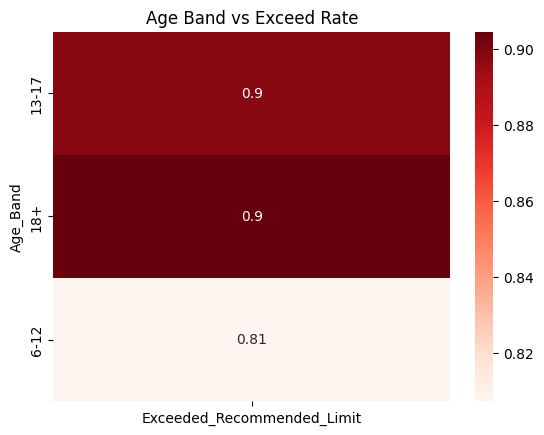

In [7]:
#Heatmap: Age Band vs Exceed Limit
heat1 = df.pivot_table(values='Exceeded_Recommended_Limit',
                       index='Age_Band',
                       aggfunc='mean')

sns.heatmap(heat1, annot=True, cmap="Reds")
plt.title("Age Band vs Exceed Rate")
plt.show()


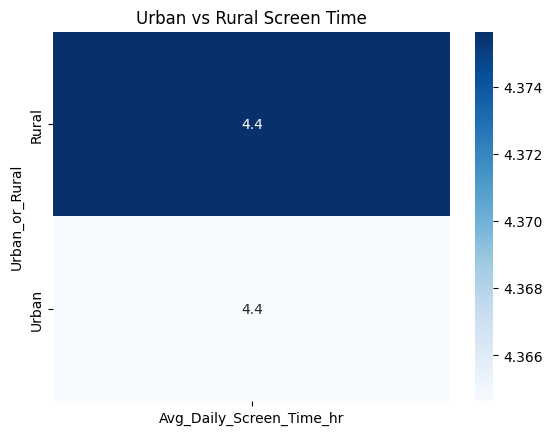

In [9]:
#Heatmap: Urban/Rural vs Screen Time
heat2 = df.pivot_table(values='Avg_Daily_Screen_Time_hr',
                       index='Urban_or_Rural',
                       aggfunc='mean')

sns.heatmap(heat2, annot=True, cmap="Blues")
plt.title("Urban vs Rural Screen Time")
plt.show()


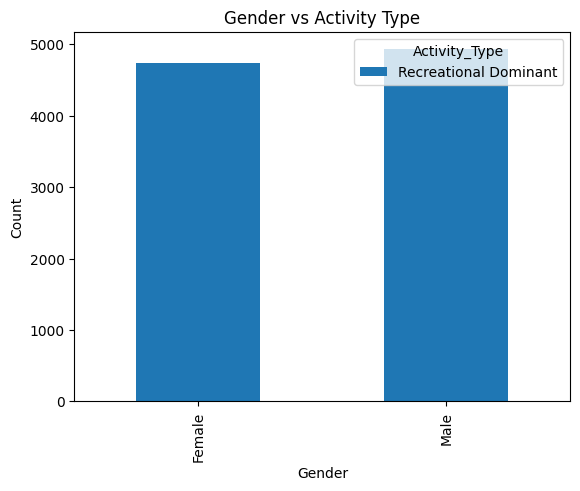

In [10]:
#Stacked Bar: Gender vs Activity Type
gender_activity = pd.crosstab(df['Gender'], df['Activity_Type'])
gender_activity.plot(kind='bar', stacked=True)
plt.title("Gender vs Activity Type")
plt.ylabel("Count")
plt.show()


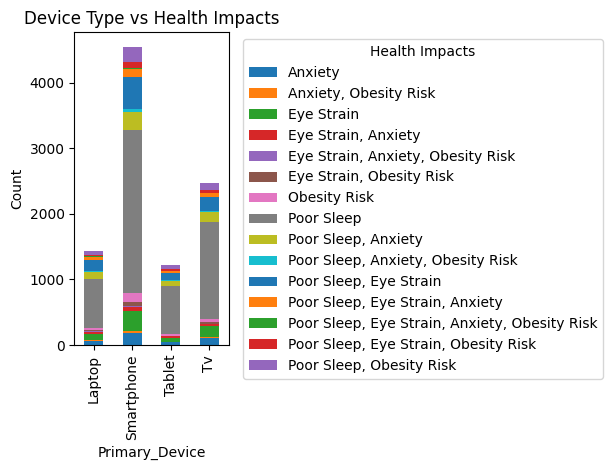

In [14]:
#Device vs Health Impacts
device_health = df.groupby('Primary_Device')['Health_Impacts'].value_counts().unstack().fillna(0)

ax = device_health.plot(kind='bar', stacked=True)

plt.title('Device Type vs Health Impacts')
plt.ylabel("Count")

# Move legend outside
plt.legend(title="Health Impacts", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [18]:
cohort.to_csv("Week5_Cohort_Analysis.csv", index=False)


In [1]:
#week6

In [5]:
day_pattern = df.groupby('Day_Type')['Avg_Daily_Screen_Time_hr'].mean().reset_index()
print(day_pattern)

  Day_Type  Avg_Daily_Screen_Time_hr
0  Weekday                  4.356108
1  Weekend                  4.379782


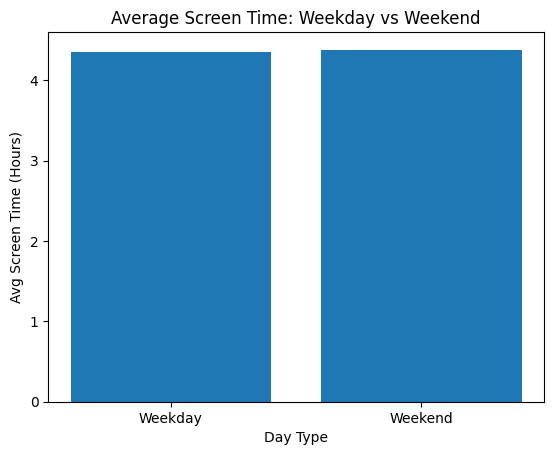

In [6]:
plt.bar(day_pattern['Day_Type'], day_pattern['Avg_Daily_Screen_Time_hr'])
plt.title("Average Screen Time: Weekday vs Weekend")
plt.xlabel("Day Type")
plt.ylabel("Avg Screen Time (Hours)")
plt.show()


In [7]:
activity_pattern = df.groupby('Activity_Type').agg(
    Avg_Screen_Time=('Avg_Daily_Screen_Time_hr','mean'),
    Exceed_Rate=('Exceeded_Recommended_Limit','mean'),
    Count=('Activity_Type','count')
).reset_index()

activity_pattern.sort_values(by="Avg_Screen_Time", ascending=False)


,Activity_Type,Avg_Screen_Time,Exceed_Rate,Count
0,Recreational Dominant,4.367887,0.857631,9665


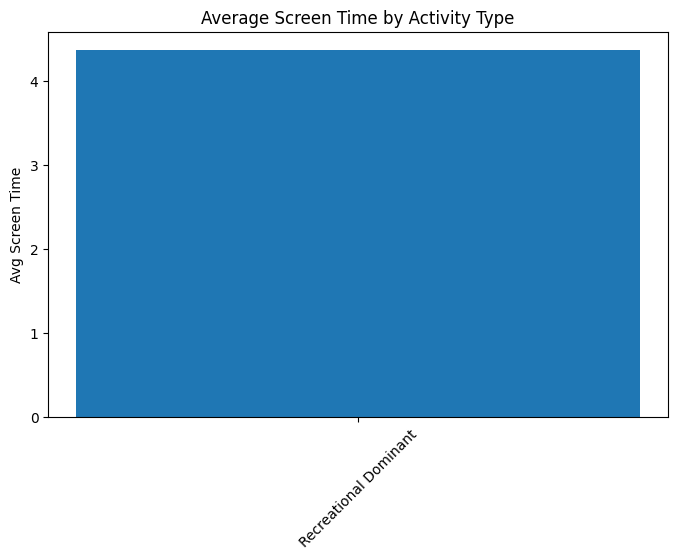

In [9]:
plt.figure(figsize=(8,5))
plt.bar(activity_pattern['Activity_Type'], activity_pattern['Avg_Screen_Time'])
plt.xticks(rotation=45)
plt.title("Average Screen Time by Activity Type")
plt.ylabel("Avg Screen Time")
plt.show()


In [10]:
habit_pattern = df.groupby(['Age_Band','Primary_Device']).agg(
    Avg_Screen_Time=('Avg_Daily_Screen_Time_hr','mean'),
    Exceed_Rate=('Exceeded_Recommended_Limit','mean')
).reset_index()

habit_pattern.sort_values(by="Avg_Screen_Time", ascending=False).head(10)


,Age_Band,Primary_Device,Avg_Screen_Time,Exceed_Rate
3,13-17,Tv,4.567944,0.911255
1,13-17,Smartphone,4.519099,0.901307
4,18+,Laptop,4.515500,0.912500
5,18+,Smartphone,4.515366,0.903073
2,13-17,Tablet,4.493991,0.889671
6,18+,Tablet,4.483125,0.937500
7,18+,Tv,4.467216,0.886364
0,13-17,Laptop,4.452542,0.880765
8,6-12,Laptop,4.449055,0.900262
9,6-12,Smartphone,4.259294,0.822878
